In [1]:
import pandas as pd
import emoji as emoji
import numpy as np
import tensorflow as tf
import sklearn
import nltk
import re
import string

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt

import time

pd.set_option("max_colwidth", 1000)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df = pd.read_csv('training_tweets.csv', encoding='utf-8')
df.drop(df.columns[[0]],axis =1, inplace = True)
training_data = df.iloc[:,0].values

In [19]:
punctuation = string.punctuation + "’"
stop_words = set(stopwords.words("english"))
url_pattern = r'https?://\S+|www\.\S+'

In [20]:
def clean(tweet):
    tweet = tweet.lower()  
    tweet = re.sub(url_pattern, "" , tweet)
    tweet = re.sub(f"[{re.escape(punctuation)}]", "", tweet)
    return tweet

In [21]:
def remove_stopwords(tokens):
    lemmatizer = WordNetLemmatizer()
    tokens = [token for token in tokens if not token in stop_words]
    tokens = ["" if token.isdigit() else token for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if len(token) > 1 or token in emoji.UNICODE_EMOJI['en']]
    return tokens

In [22]:
def preprocesse_tweets(x):
    tokenized_tweets = [word_tokenize(clean(tweet)) for tweet in x]
    tokenized_tweets = [remove_stopwords(tokens) for tokens in tokenized_tweets]
    preprocessed_tweets = [" ".join(tokens) for tokens in tokenized_tweets]
    print("preprocessed")
    return preprocessed_tweets 

In [23]:
preprocessed_tweets = preprocesse_tweets(training_data)

preprocessed


- Anger: 😡;😤;😠
- Anticipation: 👀;💭;💰
- Disgust: 😖;😣;👎
- Fear: 😨;😱;😰
- Joy: ☺;😆;😂
- Sadness: 😢;😭;💔
- Surprise: ‼;❗;😱
- Trust: 😗;💕;🌹
- Neutral: ©;®;™

In [24]:
def emotion_tweets(emotion):
    e1 = ""
    e2 = ""
    e3 = ""
    return_Tweets = []
    if(emotion ==  "Anger"):
        e1 = "\U0001F621"
        e2 = "\U0001F624"
        e3 = "\U0001F620"
    elif(emotion ==  "Anticipation"):
        e1 = "\U0001F440"
        e2 = "\U0001F4AD"
        e3 = "\U0001F4B0"
    elif(emotion ==  "Disgust"):
        e1 = "\U0001F616"
        e2 = "\U0001F623"
        e3 = "\U0001F44E"
    elif(emotion ==  "Fear"):
        e1 = "\U0001F628"
        e2 = "\U0001F631"
        e3 = "\U0001F630"
    elif(emotion ==  "Joy"):
        e1 = "\U0000263A"
        e2 = "\U0001F606"
        e3 = "\U0001F602"
    elif(emotion ==  "Sadness"):
        e1 = "\U0001F622"
        e2 = "\U0001F62D"
        e3 = "\U0001F494"
    elif(emotion ==  "Surprise"):
        e1 = "\U0000203C"
        e2 = "\U00002757"
        e3 = "\U0001F631"
    elif(emotion ==  "Trust"):
        e1 = "\U0001F617"
        e2 = "\U0001F495"
        e3 = "\U0001F339"
    elif(emotion ==  "Neutral"):
        e1 = "\U000000A9"
        e2 = "\U000000AE"
        e3 = "\U00002122"
    else:
        print("Invalid Emotion")
    for x in preprocessed_tweets:
        if e1 in x or e2 in x or e3 in x:
            x = x.replace(e1, '')
            x = x.replace(e2, '')
            x = x.replace(e3, '')
            return_Tweets.append(x)       
    return return_Tweets    

In [25]:
anger_tweets = emotion_tweets("Anger")
anticipation_tweets = emotion_tweets("Anticipation")
disgust_tweets = emotion_tweets("Disgust")
fear_tweets = emotion_tweets("Fear")
joy_tweets = emotion_tweets("Joy")
sadness_tweets = emotion_tweets("Sadness")
surprise_tweets = emotion_tweets("Surprise")
trust_tweets = emotion_tweets("Trust")
neutral_tweets = emotion_tweets("Neutral")

training_tweets=anger_tweets+anticipation_tweets+disgust_tweets+fear_tweets+joy_tweets+sadness_tweets+surprise_tweets+trust_tweets+neutral_tweets

In [26]:
emotions = []
for x in range(len(anger_tweets)):
    emotions.append("Anger")
for x in range(len(anticipation_tweets)):
    emotions.append("Anticipation")
for x in range(len(disgust_tweets)):
    emotions.append("Disgust")
for x in range(len(fear_tweets)):
    emotions.append("Fear")
for x in range(len(joy_tweets)):
    emotions.append("Joy")
for x in range(len(sadness_tweets)):
    emotions.append("Sadness")
for x in range(len(surprise_tweets)):
    emotions.append("Surprise")
for x in range(len(trust_tweets)):
    emotions.append("Trust")
for x in range(len(neutral_tweets)):
    emotions.append("Neutral")

In [27]:
vectorizer =  CountVectorizer(token_pattern=r'[^\s]+')
X = vectorizer.fit_transform(training_tweets)
X_train, X_test, y_train, y_test = train_test_split(X, emotions, test_size=0.2, random_state=0)

In [28]:
emotion_clf = LogisticRegression(random_state=0, solver = 'saga', max_iter = 10000).fit(X_train, y_train)
predictions = emotion_clf.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       Anger       0.77      0.30      0.43      1369
Anticipation       0.74      0.42      0.53      3137
     Disgust       0.82      0.22      0.35       564
        Fear       0.33      0.17      0.22      1398
         Joy       0.70      0.90      0.78     28271
     Neutral       0.89      0.68      0.77      2194
     Sadness       0.69      0.60      0.64     13620
    Surprise       0.65      0.46      0.54      3186
       Trust       0.67      0.49      0.56      5548

    accuracy                           0.70     59287
   macro avg       0.69      0.47      0.54     59287
weighted avg       0.69      0.70      0.68     59287

0.695413834398772


In [29]:
df_Corona_early = pd.read_csv('early-covid-tweets.csv', header = None, encoding='utf-8')
df_Corona_late = pd.read_csv('late-covid-tweets.csv', header = None, encoding='utf-8')

In [30]:
corona_early_data = df_Corona_early.iloc[:,0].values
corona_early_tweets = preprocesse_tweets(corona_early_data)

corona_late_data = df_Corona_late.iloc[:,0].values
corona_late_tweets = preprocesse_tweets(corona_late_data)

preprocessed
preprocessed


In [31]:
X_Corona_early = vectorizer.transform(corona_early_tweets)
X_Corona_late = vectorizer.transform(corona_late_tweets)

corona_early_em_predictions = emotion_clf.predict(X_Corona_early)
corona_late_em_predictions = emotion_clf.predict(X_Corona_late)

df_Corona_early = df_Corona_early.assign(emotions = corona_early_em_predictions)
df_Corona_late = df_Corona_late.assign(emotions = corona_late_em_predictions)

Text(0.5, 1.0, 'Emotions Covid December 2020')

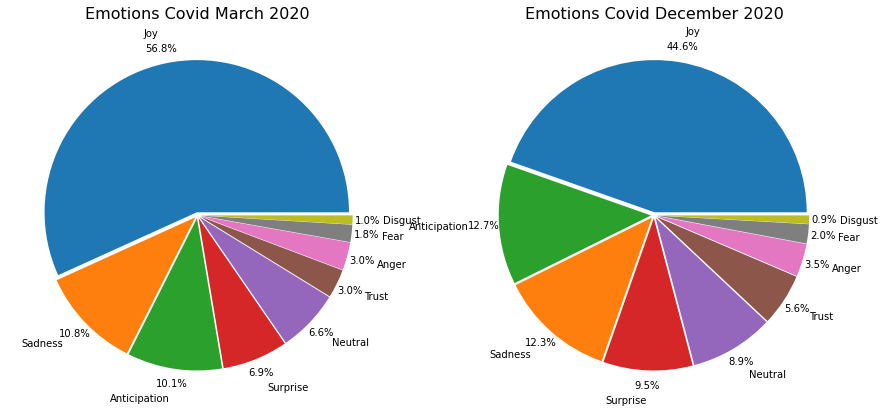

In [32]:
values_early = df_Corona_early['emotions'].value_counts()
values_late = df_Corona_late['emotions'].value_counts()

colours = dict(zip(values_early.keys(), plt.cm.tab10.colors[:9]))
fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].pie(values_early.tolist(),labels = values_early.keys(),colors=[colours[key] for key in values_early.keys()], explode = [0.02]*9, autopct="%1.1f%%", pctdistance=1.1, labeldistance=1.2)
ax[0].set_title('Emotions Covid March 2020', fontsize=16)

ax[1].pie(values_late.tolist(),labels = values_late.keys(),colors=[colours[key] for key in values_late.keys()], explode = [0.02]*9, autopct="%1.1f%%", pctdistance=1.1, labeldistance=1.2)
ax[1].set_title('Emotions Covid December 2020', fontsize=16)